## Run some Python code!

To run the code below:

1. Click on the cell to select it.
2. Press `SHIFT+ENTER` on your keyboard or press the play button (<button class='fa fa-play icon-play btn btn-xs btn-default'></button>) in the toolbar above.

### Examples

Some example (mostly from http://matplotlib.org/examples)


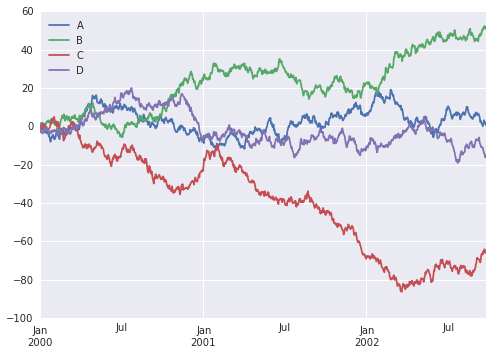

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib

from matplotlib import pyplot as plt
import seaborn as sns

ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()

df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')




### high-resolution tricontouring on user-defined triangular grids

http://matplotlib.org/examples/pylab_examples/tricontour_smooth_user.html

/opt/conda/envs/python2/lib/python2.7/site-packages/matplotlib/tri/triangulation.py:110: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  self._neighbors)


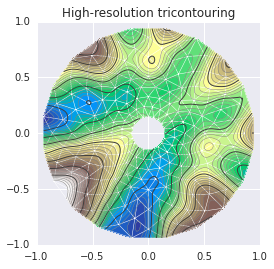

In [2]:
%matplotlib inline
"""
Demonstrates high-resolution tricontouring on user-defined triangular grids
with matplotlib.tri.UniformTriRefiner
"""
from matplotlib.tri import Triangulation, UniformTriRefiner
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import math


#-----------------------------------------------------------------------------
# Analytical test function
#-----------------------------------------------------------------------------
def function_z(x, y):
    """ A function of 2 variables """
    r1 = np.sqrt((0.5-x)**2 + (0.5-y)**2)
    theta1 = np.arctan2(0.5-x, 0.5-y)
    r2 = np.sqrt((-x-0.2)**2 + (-y-0.2)**2)
    theta2 = np.arctan2(-x-0.2, -y-0.2)
    z = -(2*(np.exp((r1/10)**2)-1)*30. * np.cos(7.*theta1) +
          (np.exp((r2/10)**2)-1)*30. * np.cos(11.*theta2) +
          0.7*(x**2 + y**2))
    return (np.max(z)-z)/(np.max(z)-np.min(z))

#-----------------------------------------------------------------------------
# Creating a Triangulation
#-----------------------------------------------------------------------------
# First create the x and y coordinates of the points.
n_angles = 20
n_radii = 10
min_radius = 0.15
radii = np.linspace(min_radius, 0.95, n_radii)

angles = np.linspace(0, 2*math.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += math.pi/n_angles

x = (radii*np.cos(angles)).flatten()
y = (radii*np.sin(angles)).flatten()
z = function_z(x, y)

# Now create the Triangulation.
# (Creating a Triangulation without specifying the triangles results in the
# Delaunay triangulation of the points.)
triang = Triangulation(x, y)

# Mask off unwanted triangles.
xmid = x[triang.triangles].mean(axis=1)
ymid = y[triang.triangles].mean(axis=1)
mask = np.where(xmid*xmid + ymid*ymid < min_radius*min_radius, 1, 0)
triang.set_mask(mask)

#-----------------------------------------------------------------------------
# Refine data
#-----------------------------------------------------------------------------
refiner = UniformTriRefiner(triang)
tri_refi, z_test_refi = refiner.refine_field(z, subdiv=3)

#-----------------------------------------------------------------------------
# Plot the triangulation and the high-res iso-contours
#-----------------------------------------------------------------------------
plt.figure()
plt.gca().set_aspect('equal')
plt.triplot(triang, lw=0.5, color='white')

levels = np.arange(0., 1., 0.025)
cmap = cm.get_cmap(name='terrain', lut=None)
plt.tricontourf(tri_refi, z_test_refi, levels=levels, cmap=cmap)
plt.tricontour(tri_refi, z_test_refi, levels=levels,
               colors=['0.25', '0.5', '0.5', '0.5', '0.5'],
               linewidths=[1.0, 0.5, 0.5, 0.5, 0.5])

plt.title("High-resolution tricontouring")

plt.show()

### Date plotting

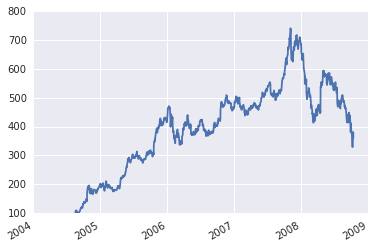

In [3]:
%matplotlib inline
"""
Show how to make date plots in matplotlib using date tick locators and
formatters.  See major_minor_demo1.py for more information on
controlling major and minor ticks

All matplotlib date plotting is done by converting date instances into
days since the 0001-01-01 UTC.  The conversion, tick locating and
formatting is done behind the scenes so this is most transparent to
you.  The dates module provides several converter functions date2num
and num2date

"""
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years    = mdates.YearLocator()   # every year
months   = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

# load a numpy record array from yahoo csv data with fields date,
# open, close, volume, adj_close from the mpl-data/example directory.
# The record array stores python datetime.date as an object array in
# the date column
datafile = cbook.get_sample_data('goog.npy')
r = np.load(datafile).view(np.recarray)

fig, ax = plt.subplots()
ax.plot(r.date, r.adj_close)


# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

datemin = datetime.date(r.date.min().year, 1, 1)
datemax = datetime.date(r.date.max().year+1, 1, 1)
ax.set_xlim(datemin, datemax)

# format the coords message box
def price(x): return '$%1.2f'%x
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = price
ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

plt.show()

### Boxplot example

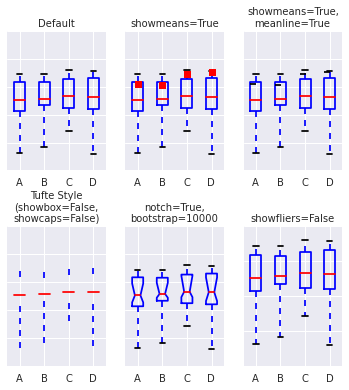

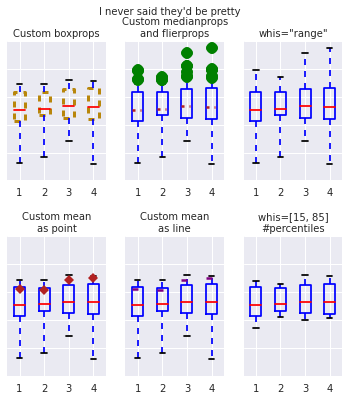

In [4]:
%matplotlib inline

"""
Demo of the new boxplot functionality
"""

import numpy as np
import matplotlib.pyplot as plt

# fake data
np.random.seed(937)
data = np.random.lognormal(size=(37, 4), mean=1.5, sigma=1.75)
labels = list('ABCD')
fs = 10 # fontsize

# demonstrate how to toggle the display of different elements:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(6,6))
axes[0, 0].boxplot(data, labels=labels)
axes[0, 0].set_title('Default', fontsize=fs)

axes[0, 1].boxplot(data, labels=labels, showmeans=True)
axes[0, 1].set_title('showmeans=True', fontsize=fs)

axes[0, 2].boxplot(data, labels=labels, showmeans=True, meanline=True)
axes[0, 2].set_title('showmeans=True,\nmeanline=True', fontsize=fs)

axes[1, 0].boxplot(data, labels=labels, showbox=False, showcaps=False)
axes[1, 0].set_title('Tufte Style \n(showbox=False,\nshowcaps=False)', fontsize=fs)

axes[1, 1].boxplot(data, labels=labels, notch=True, bootstrap=10000)
axes[1, 1].set_title('notch=True,\nbootstrap=10000', fontsize=fs)

axes[1, 2].boxplot(data, labels=labels, showfliers=False)
axes[1, 2].set_title('showfliers=False', fontsize=fs)

for ax in axes.flatten():
    ax.set_yscale('log')
    ax.set_yticklabels([])

fig.subplots_adjust(hspace=0.4)
plt.show()


# demonstrate how to customize the display different elements:
boxprops = dict(linestyle='--', linewidth=3, color='darkgoldenrod')
flierprops = dict(marker='o', markerfacecolor='green', markersize=12,
                  linestyle='none')
medianprops = dict(linestyle='-.', linewidth=2.5, color='firebrick')
meanpointprops = dict(marker='D', markeredgecolor='black',
                      markerfacecolor='firebrick')
meanlineprops = dict(linestyle='--', linewidth=2.5, color='purple')

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(6,6))
axes[0, 0].boxplot(data, boxprops=boxprops)
axes[0, 0].set_title('Custom boxprops', fontsize=fs)

axes[0, 1].boxplot(data, flierprops=flierprops, medianprops=medianprops)
axes[0, 1].set_title('Custom medianprops\nand flierprops', fontsize=fs)

axes[0, 2].boxplot(data, whis='range')
axes[0, 2].set_title('whis="range"', fontsize=fs)

axes[1, 0].boxplot(data, meanprops=meanpointprops, meanline=False,
                   showmeans=True)
axes[1, 0].set_title('Custom mean\nas point', fontsize=fs)

axes[1, 1].boxplot(data, meanprops=meanlineprops, meanline=True, showmeans=True)
axes[1, 1].set_title('Custom mean\nas line', fontsize=fs)

axes[1, 2].boxplot(data, whis=[15, 85])
axes[1, 2].set_title('whis=[15, 85]\n#percentiles', fontsize=fs)

for ax in axes.flatten():
    ax.set_yscale('log')
    ax.set_yticklabels([])

fig.suptitle("I never said they'd be pretty")
fig.subplots_adjust(hspace=0.4)
plt.show()
